In [20]:
# Import Dependencies
import pandas as pd
import numpy as np

In [21]:
#  Notebook exeercising API
freedom_csv_path = "data/indexfreedom.csv"
#happy_csv_path = "data/TBD"

In [22]:
# READ freedom.csv

freedom_df = pd.read_csv(freedom_csv_path, encoding="utf-8")
freedom_df

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


In [26]:
# drop rows for 2008-2015 
other_years = freedom_df[ (freedom_df['year'] < 2016) ].index

# Delete these row indexes from dataFrame
only_2016_df= freedom_df.drop(other_years , inplace=True)


freedom_df


,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2016,VEN,Venezuela,Latin America & the Caribbean,1.479799,3.271891,1.429083,2.060257,0.000000,10.0,...,1.522774,4.996742,1.122213,2.009841,2.483540,2.88,162.0,4.200724,161.0,4.0
158,2016,VNM,Vietnam,South Asia,5.376034,4.448922,4.911257,4.912071,9.392643,5.0,...,3.661293,8.210613,4.417755,5.896365,6.701358,6.42,112.0,6.194004,124.0,4.0
159,2016,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,2.623957,7.336599,0.0,...,2.112554,NaN,7.220087,4.159381,5.227397,6.34,117.0,4.253278,160.0,4.0
160,2016,ZMB,Zambia,Sub-Saharan Africa,3.300633,4.891213,4.154905,4.115584,7.880823,10.0,...,3.141872,7.831044,8.161670,6.174719,6.412301,6.61,97.0,6.308849,116.0,3.0


In [27]:
# keep only the ef_score and pf_score
scores_df= freedom_df[['countries','pf_score','ef_score']]
scores_df


,countries,pf_score,ef_score
0,Albania,7.596281,7.54
1,Algeria,5.281772,4.99
2,Angola,6.111324,5.17
3,Argentina,8.099696,4.84
4,Armenia,6.912804,7.57
...,...,...,...
157,Venezuela,5.521449,2.88
158,Vietnam,5.968008,6.42
159,"Yemen, Rep.",2.166555,6.34
160,Zambia,6.007699,6.61


In [28]:
import matplotlib.pyplot as plt

In [31]:
# plot
# first turn columns into lists
pf_score = scores_df["pf_score"].values
ef_score = scores_df["ef_score"].values
countries = scores_df["countries"].values


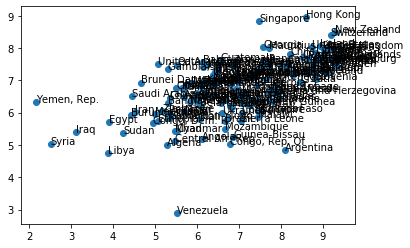

In [32]:
# create plot
fig, ax = plt.subplots()
ax.scatter(pf_score, ef_score)

for i, txt in enumerate(countries):
    ax.annotate(txt, (pf_score[i], ef_score[i]))

Text(0, 0.5, 'Economic Freedom')

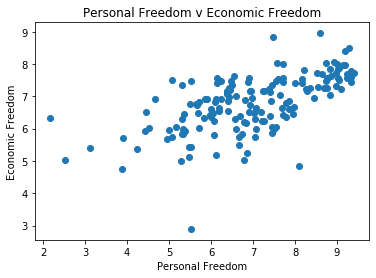

In [34]:
# with out labels bc idk how to clean it up
fig, ax = plt.subplots()
ax.scatter(pf_score, ef_score)
plt.title("Personal Freedom v Economic Freedom")
plt.xlabel("Personal Freedom")
plt.ylabel("Economic Freedom")

In [37]:
import scipy.stats as stats

In [38]:
# give or take a few outliers it seems to be that higher personal freedom correlates to higher ecoonomic freedom
# independent t-test
stats.ttest_ind(pf_score, ef_score, equal_var=False)

Ttest_indResult(statistic=1.3920335665167696, pvalue=0.16509191278542293)

In [ ]:
# pvalue is greater than .05 so accept the null?
